In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Tuple
import re

pd.set_option("display.min_rows", 10)

In [2]:
quadro = ''

In [3]:
_dir = r"..\00_dados\1_dados_harmonicas_tensao"
files = [file for file in os.listdir(_dir) if file.endswith(".csv")]
list(zip(list(range(len(files))),files))

[(0, 'harmonicas_tensao_QGBT2_V1_INPS0014.csv'),
 (1, 'harmonicas_tensao_QGBT2_V2_INPS0014.csv'),
 (2, 'harmonicas_tensao_QGBT2_V3_INPS0014.csv'),
 (3, 'harmonicas_tensao_QGBT3_V1_INPS0013.csv'),
 (4, 'harmonicas_tensao_QGBT3_V2_INPS0013.csv'),
 (5, 'harmonicas_tensao_QGBT3_V3_INPS0013.csv'),
 (6, 'harmonicas_tensao_QGBT4_V1_INSP0011.csv'),
 (7, 'harmonicas_tensao_QGBT4_V2_INSP0011.csv'),
 (8, 'harmonicas_tensao_QGBT4_V3_INSP0011.csv')]

In [4]:
path = os.path.join(_dir, files[8])
path

'..\\00_dados\\1_dados_harmonicas_tensao\\harmonicas_tensao_QGBT4_V3_INSP0011.csv'

In [5]:
fase = path[62:64]
fase

'V3'

In [6]:
df = pd.read_csv(path, sep=';', decimal=',', skiprows=37)
df = df.drop(columns=['No', 'ELAPSED TIME','Unnamed: 53'])
df = df.rename(columns={'DateTime': 'Tempo'})
df["Tempo"] = pd.to_datetime(df["Tempo"], format="%Y/%m/%d %H:%M:%S")
df

,Tempo,AVG[01]_V3[V],AVG[02]_V3[V],AVG[03]_V3[V],AVG[04]_V3[V],AVG[05]_V3[V],AVG[06]_V3[V],AVG[07]_V3[V],AVG[08]_V3[V],AVG[09]_V3[V],...,AVG[41]_V3[V],AVG[42]_V3[V],AVG[43]_V3[V],AVG[44]_V3[V],AVG[45]_V3[V],AVG[46]_V3[V],AVG[47]_V3[V],AVG[48]_V3[V],AVG[49]_V3[V],AVG[50]_V3[V]
0,2023-02-08 14:56:52,227.9754,0.033261,1.094395,0.000000,2.798057,0.000000,4.101948,0.000000,0.755752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-02-08 15:06:52,229.3764,0.040195,1.182876,0.000000,2.988333,0.000000,4.363882,0.000000,0.794192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-02-08 15:16:52,230.4901,0.045118,0.995298,0.000428,3.097190,0.000000,4.448811,0.000000,0.722320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-02-08 15:26:52,231.0721,0.032019,0.994313,0.000000,3.216963,0.000000,4.500478,0.000000,0.687389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-02-08 15:36:52,232.4237,0.093618,0.982199,0.006721,3.470379,0.013784,4.842889,0.000128,0.721806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,2023-02-16 15:16:52,228.2621,0.059844,1.345884,0.000257,3.267432,0.000000,4.040735,0.000000,0.785074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1155,2023-02-16 15:26:52,229.1262,0.022902,1.173930,0.000000,3.308484,0.000000,4.185806,0.000000,0.669667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1156,2023-02-16 15:36:52,230.6438,0.022131,1.071922,0.000000,3.254291,0.000000,4.410798,0.000000,0.684564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157,2023-02-16 15:46:52,231.2275,0.033603,1.085063,0.000000,3.459249,0.000000,4.397400,0.000000,0.825270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df[df[f"AVG[01]_{fase}[V]"] == 0 ]

,Tempo,AVG[01]_V3[V],AVG[02]_V3[V],AVG[03]_V3[V],AVG[04]_V3[V],AVG[05]_V3[V],AVG[06]_V3[V],AVG[07]_V3[V],AVG[08]_V3[V],AVG[09]_V3[V],...,AVG[41]_V3[V],AVG[42]_V3[V],AVG[43]_V3[V],AVG[44]_V3[V],AVG[45]_V3[V],AVG[46]_V3[V],AVG[47]_V3[V],AVG[48]_V3[V],AVG[49]_V3[V],AVG[50]_V3[V]


# Definição Parâmetros

In [8]:
class Horario:
    def __init__(self, h_dia, h_ponta, h_noite, h_madrugada):
        self.H_DIA = h_dia
        self.H_PONTA = h_ponta
        self.H_NOITE = h_noite
        self.H_MADRUGADA = h_madrugada

Dia_util = Horario(dt.time(7, 0, 0), dt.time(18, 0, 0), dt.time(21, 0, 0), dt.time(23, 59, 59))  # Horarios do dia útil

# Criar DF utilizado

In [9]:
dados_H = df[0:1008].copy()
dados_H['Dia_Semana'] = dados_H['Tempo'].dt.weekday
dias_semana = {
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
    6: "Domingo"
}
dados_H['Dia_Semana_PT_BR'] = dados_H['Tempo'].dt.weekday.map(dias_semana)
########## Determina tipo de horário
dados_H['Tipo_Hora'] = ['Dia' if (hora >= Dia_util.H_DIA) & (hora < Dia_util.H_PONTA) else
                         'Ponta' if (hora >= Dia_util.H_PONTA) & (hora < Dia_util.H_NOITE) else
                         'Noite' if (hora >= Dia_util.H_NOITE) & (hora < Dia_util.H_MADRUGADA) else
                         'Madrugada' for hora in dados_H['Tempo'].dt.time]

dados_H

,Tempo,AVG[01]_V3[V],AVG[02]_V3[V],AVG[03]_V3[V],AVG[04]_V3[V],AVG[05]_V3[V],AVG[06]_V3[V],AVG[07]_V3[V],AVG[08]_V3[V],AVG[09]_V3[V],...,AVG[44]_V3[V],AVG[45]_V3[V],AVG[46]_V3[V],AVG[47]_V3[V],AVG[48]_V3[V],AVG[49]_V3[V],AVG[50]_V3[V],Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora
0,2023-02-08 14:56:52,227.9754,0.033261,1.094395,0.000000,2.798057,0.000000,4.101948,0.000000,0.755752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1,2023-02-08 15:06:52,229.3764,0.040195,1.182876,0.000000,2.988333,0.000000,4.363882,0.000000,0.794192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
2,2023-02-08 15:16:52,230.4901,0.045118,0.995298,0.000428,3.097190,0.000000,4.448811,0.000000,0.722320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
3,2023-02-08 15:26:52,231.0721,0.032019,0.994313,0.000000,3.216963,0.000000,4.500478,0.000000,0.687389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
4,2023-02-08 15:36:52,232.4237,0.093618,0.982199,0.006721,3.470379,0.013784,4.842889,0.000128,0.721806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,226.3035,0.052139,1.177354,0.000128,2.059172,0.000000,4.094714,0.000000,0.678143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1004,2023-02-15 14:16:52,226.2162,0.061770,1.178596,0.002012,2.139006,0.000000,4.051394,0.000000,0.717097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1005,2023-02-15 14:26:52,226.7441,0.077437,1.080140,0.033004,2.324787,0.000000,4.025067,0.002183,0.647536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1006,2023-02-15 14:36:52,226.4619,0.045332,1.153597,0.002312,2.374443,0.005351,4.100536,0.000000,0.671851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia


In [10]:
df_dist = pd.DataFrame(dados_H["Tempo"].copy())
df_dist

,Tempo
0,2023-02-08 14:56:52
1,2023-02-08 15:06:52
2,2023-02-08 15:16:52
3,2023-02-08 15:26:52
4,2023-02-08 15:36:52
...,...
1003,2023-02-15 14:06:52
1004,2023-02-15 14:16:52
1005,2023-02-15 14:26:52
1006,2023-02-15 14:36:52


# Distorção Harmônica Total de Tensão

$$
\Large
\mathrm{DTT}\%=\frac{\sqrt{\sum_{h=2}^{h_{\max}} V_h^{2}}}{V_1}\times 100
\quad \big(h=2,3,4,5,6,\ldots,50\big)
$$


In [39]:
def add_dtt_percentual(df, col_out, v=fase):
    V1 = df[f'AVG[01]_{v}[V]'].to_numpy()
    Vh = df.loc[:, f'AVG[02]_{v}[V]':f'AVG[50]_{v}[V]'].to_numpy()
    df[col_out] = np.sqrt((Vh**2).sum(axis=1)) / V1 * 100
    return df


In [40]:
df_dtt = add_dtt_percentual(dados_H.copy(), 'DTT_%')
df_dist['DTT_%'] = df_dtt['DTT_%']
df_dtt

,Tempo,AVG[01]_V3[V],AVG[02]_V3[V],AVG[03]_V3[V],AVG[04]_V3[V],AVG[05]_V3[V],AVG[06]_V3[V],AVG[07]_V3[V],AVG[08]_V3[V],AVG[09]_V3[V],...,AVG[45]_V3[V],AVG[46]_V3[V],AVG[47]_V3[V],AVG[48]_V3[V],AVG[49]_V3[V],AVG[50]_V3[V],Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora,DTT_%
0,2023-02-08 14:56:52,227.9754,0.033261,1.094395,0.000000,2.798057,0.000000,4.101948,0.000000,0.755752,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.306572
1,2023-02-08 15:06:52,229.3764,0.040195,1.182876,0.000000,2.988333,0.000000,4.363882,0.000000,0.794192,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.439180
2,2023-02-08 15:16:52,230.4901,0.045118,0.995298,0.000428,3.097190,0.000000,4.448811,0.000000,0.722320,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.453447
3,2023-02-08 15:26:52,231.0721,0.032019,0.994313,0.000000,3.216963,0.000000,4.500478,0.000000,0.687389,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.494445
4,2023-02-08 15:36:52,232.4237,0.093618,0.982199,0.006721,3.470379,0.013784,4.842889,0.000128,0.721806,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.664023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,226.3035,0.052139,1.177354,0.000128,2.059172,0.000000,4.094714,0.000000,0.678143,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.132942
1004,2023-02-15 14:16:52,226.2162,0.061770,1.178596,0.002012,2.139006,0.000000,4.051394,0.000000,0.717097,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.135867
1005,2023-02-15 14:26:52,226.7441,0.077437,1.080140,0.033004,2.324787,0.000000,4.025067,0.002183,0.647536,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.137937
1006,2023-02-15 14:36:52,226.4619,0.045332,1.153597,0.002312,2.374443,0.005351,4.100536,0.000000,0.671851,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.191131


# Distorção Harmônica Total de Tensão para componentes pares não múltiplas de 3

$$
\Large
\mathrm{DTT}_{p}\%=\frac{\sqrt{\sum_{h=2}^{h_p} V_h^{2}}}{V_1}\times 100
\quad \big(h=2,4,8,10,14,\ldots,50\big)
$$


In [13]:
def selecionar_cols_par_nao_mult3(df, v=fase):
    cols = ['Tempo', f'AVG[01]_{v}[V]'] + [c for c in df.columns
        if c not in ['Tempo', 'Dia_Semana', 'Dia_Semana_PT_BR', 'Tipo_Hora'] and int(c[4:6]) % 2 == 0 and int(c[4:6]) % 3 != 0
    ] + ['Dia_Semana', 'Dia_Semana_PT_BR', 'Tipo_Hora']
    return df.loc[:, cols]


In [14]:
df_dttp = selecionar_cols_par_nao_mult3(dados_H[dados_H.columns])
df_dttp

,Tempo,AVG[01]_V3[V],AVG[02]_V3[V],AVG[04]_V3[V],AVG[08]_V3[V],AVG[10]_V3[V],AVG[14]_V3[V],AVG[16]_V3[V],AVG[20]_V3[V],AVG[22]_V3[V],...,AVG[32]_V3[V],AVG[34]_V3[V],AVG[38]_V3[V],AVG[40]_V3[V],AVG[44]_V3[V],AVG[46]_V3[V],AVG[50]_V3[V],Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora
0,2023-02-08 14:56:52,227.9754,0.033261,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1,2023-02-08 15:06:52,229.3764,0.040195,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
2,2023-02-08 15:16:52,230.4901,0.045118,0.000428,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
3,2023-02-08 15:26:52,231.0721,0.032019,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
4,2023-02-08 15:36:52,232.4237,0.093618,0.006721,0.000128,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,226.3035,0.052139,0.000128,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1004,2023-02-15 14:16:52,226.2162,0.061770,0.002012,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1005,2023-02-15 14:26:52,226.7441,0.077437,0.033004,0.002183,0.01327,0.000428,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1006,2023-02-15 14:36:52,226.4619,0.045332,0.002312,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia


In [15]:
def add_dttp_percent(df, col_out, hp, v):
    V1 = df[f'AVG[01]_{v}[V]'].to_numpy()
    Vh = df.loc[:, f'AVG[02]_{v}[V]':f'AVG[{hp:02d}]_{v}[V]'].to_numpy()
    print(len(Vh[0])) # Numero colunas pares não multiplas de 3
    df[col_out] = np.sqrt((Vh**2).sum(axis=1)) / V1 * 100
    return df


In [16]:
df_dttp = add_dttp_percent(df_dttp, 'DTTP_%', 50, v=fase)
df_dist['DTTP_%'] = df_dttp['DTTP_%']
df_dttp

17


,Tempo,AVG[01]_V3[V],AVG[02]_V3[V],AVG[04]_V3[V],AVG[08]_V3[V],AVG[10]_V3[V],AVG[14]_V3[V],AVG[16]_V3[V],AVG[20]_V3[V],AVG[22]_V3[V],...,AVG[34]_V3[V],AVG[38]_V3[V],AVG[40]_V3[V],AVG[44]_V3[V],AVG[46]_V3[V],AVG[50]_V3[V],Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora,DTTP_%
0,2023-02-08 14:56:52,227.9754,0.033261,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.014590
1,2023-02-08 15:06:52,229.3764,0.040195,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.017524
2,2023-02-08 15:16:52,230.4901,0.045118,0.000428,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.019576
3,2023-02-08 15:26:52,231.0721,0.032019,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.013857
4,2023-02-08 15:36:52,232.4237,0.093618,0.006721,0.000128,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.040383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,226.3035,0.052139,0.000128,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.023039
1004,2023-02-15 14:16:52,226.2162,0.061770,0.002012,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.027320
1005,2023-02-15 14:26:52,226.7441,0.077437,0.033004,0.002183,0.01327,0.000428,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.037596
1006,2023-02-15 14:36:52,226.4619,0.045332,0.002312,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.020044


# Distornão Harmônica para componentes ímpares não múltiplas de 3

$$
\Large
\mathrm{DTT}_{I}\%=\frac{\sqrt{\sum_{h=5}^{h_i} V_h^{2}}}{V_1}\times 100
\quad \big(h=5,7,11,13,\ldots,49\big)
$$


In [17]:
def selecionar_cols_imp_nao_mult3(df, v=fase):
    cols = ['Tempo'] + [c for c in df.columns
        if c not in ['Tempo', 'Dia_Semana', 'Dia_Semana_PT_BR', 'Tipo_Hora'] and int(c[4:6]) % 2 != 0 and int(c[4:6]) % 3 != 0
    ] + ['Dia_Semana', 'Dia_Semana_PT_BR', 'Tipo_Hora']
    return df.loc[:, cols]

In [18]:
df_dtti = selecionar_cols_imp_nao_mult3(dados_H[dados_H.columns])
df_dtti

,Tempo,AVG[01]_V3[V],AVG[05]_V3[V],AVG[07]_V3[V],AVG[11]_V3[V],AVG[13]_V3[V],AVG[17]_V3[V],AVG[19]_V3[V],AVG[23]_V3[V],AVG[25]_V3[V],...,AVG[31]_V3[V],AVG[35]_V3[V],AVG[37]_V3[V],AVG[41]_V3[V],AVG[43]_V3[V],AVG[47]_V3[V],AVG[49]_V3[V],Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora
0,2023-02-08 14:56:52,227.9754,2.798057,4.101948,0.286933,0.702800,0.136296,0.013227,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1,2023-02-08 15:06:52,229.3764,2.988333,4.363882,0.293397,0.698647,0.172682,0.075554,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
2,2023-02-08 15:16:52,230.4901,3.097190,4.448811,0.180045,0.663289,0.175764,0.120458,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
3,2023-02-08 15:26:52,231.0721,3.216963,4.500478,0.152006,0.696764,0.182999,0.087925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
4,2023-02-08 15:36:52,232.4237,3.470379,4.842889,0.143317,0.787172,0.238048,0.150380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,226.3035,2.059172,4.094714,0.224906,0.314800,0.180344,0.203931,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1004,2023-02-15 14:16:52,226.2162,2.139006,4.051394,0.254100,0.315656,0.119559,0.188991,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1005,2023-02-15 14:26:52,226.7441,2.324787,4.025067,0.313644,0.214847,0.094646,0.037927,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1006,2023-02-15 14:36:52,226.4619,2.374443,4.100536,0.393821,0.198109,0.147854,0.000257,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia


In [19]:
def add_dtti_percent(df, col_out, h, v=fase):
    V1 = df[f'AVG[01]_{v}[V]'].to_numpy()
    Vh = df.loc[:, f'AVG[05]_{v}[V]':f'AVG[{h:02d}]_{v}[V]'].to_numpy()
    print(len(Vh[0]))
    df[col_out] = np.sqrt((Vh**2).sum(axis=1)) / V1 * 100
    return df

In [20]:
df_dtti = add_dtti_percent(df_dtti, 'DTTI_%', 49, fase)  # soma de h=5 até h_i=50
df_dist['DTTI_%'] = df_dtti['DTTI_%']
df_dtti

16


,Tempo,AVG[01]_V3[V],AVG[05]_V3[V],AVG[07]_V3[V],AVG[11]_V3[V],AVG[13]_V3[V],AVG[17]_V3[V],AVG[19]_V3[V],AVG[23]_V3[V],AVG[25]_V3[V],...,AVG[35]_V3[V],AVG[37]_V3[V],AVG[41]_V3[V],AVG[43]_V3[V],AVG[47]_V3[V],AVG[49]_V3[V],Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora,DTTI_%
0,2023-02-08 14:56:52,227.9754,2.798057,4.101948,0.286933,0.702800,0.136296,0.013227,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.204163
1,2023-02-08 15:06:52,229.3764,2.988333,4.363882,0.293397,0.698647,0.172682,0.075554,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.330814
2,2023-02-08 15:16:52,230.4901,3.097190,4.448811,0.180045,0.663289,0.175764,0.120458,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.372465
3,2023-02-08 15:26:52,231.0721,3.216963,4.500478,0.152006,0.696764,0.182999,0.087925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.415473
4,2023-02-08 15:36:52,232.4237,3.470379,4.842889,0.143317,0.787172,0.238048,0.150380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.589245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,226.3035,2.059172,4.094714,0.224906,0.314800,0.180344,0.203931,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.036060
1004,2023-02-15 14:16:52,226.2162,2.139006,4.051394,0.254100,0.315656,0.119559,0.188991,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.035535
1005,2023-02-15 14:26:52,226.7441,2.324787,4.025067,0.313644,0.214847,0.094646,0.037927,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.057315
1006,2023-02-15 14:36:52,226.4619,2.374443,4.100536,0.393821,0.198109,0.147854,0.000257,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,2.102408


# Distornão Harmônica para componentes múltiplas de 3

$$
\Large
\mathrm{DTT}_{3}\%=\frac{\sqrt{\sum_{h=3}^{h_3} V_h^{2}}}{V_1}\times 100
\quad \big(h=3,6,9,12,\ldots,48\big)
$$


In [21]:
def selecionar_cols_imp(df, v=fase):
    cols = ['Tempo', f'AVG[01]_{v}[V]'] + [c for c in df.columns
        if c not in ['Tempo', 'Dia_Semana', 'Dia_Semana_PT_BR', 'Tipo_Hora'] and  int(c[4:6]) % 3 == 0
    ] + ['Dia_Semana', 'Dia_Semana_PT_BR', 'Tipo_Hora']
    return df.loc[:, cols]

In [22]:
df_dtt3 = selecionar_cols_imp(dados_H)
df_dtt3

,Tempo,AVG[01]_V3[V],AVG[03]_V3[V],AVG[06]_V3[V],AVG[09]_V3[V],AVG[12]_V3[V],AVG[15]_V3[V],AVG[18]_V3[V],AVG[21]_V3[V],AVG[24]_V3[V],...,AVG[30]_V3[V],AVG[33]_V3[V],AVG[36]_V3[V],AVG[39]_V3[V],AVG[42]_V3[V],AVG[45]_V3[V],AVG[48]_V3[V],Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora
0,2023-02-08 14:56:52,227.9754,1.094395,0.000000,0.755752,0.000000,0.794278,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1,2023-02-08 15:06:52,229.3764,1.182876,0.000000,0.794192,0.000000,0.829507,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
2,2023-02-08 15:16:52,230.4901,0.995298,0.000000,0.722320,0.000000,0.749545,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
3,2023-02-08 15:26:52,231.0721,0.994313,0.000000,0.687389,0.000000,0.779852,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
4,2023-02-08 15:36:52,232.4237,0.982199,0.013784,0.721806,0.000000,0.792052,0.0,0.005222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,226.3035,1.177354,0.000000,0.678143,0.000000,0.468776,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1004,2023-02-15 14:16:52,226.2162,1.178596,0.000000,0.717097,0.000000,0.484357,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1005,2023-02-15 14:26:52,226.7441,1.080140,0.000000,0.647536,0.010659,0.381536,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia
1006,2023-02-15 14:36:52,226.4619,1.153597,0.005351,0.671851,0.000000,0.411543,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia


In [23]:
def add_dtt3_percent(df, col_out, h, v=fase):
    V1 = df[f'AVG[01]_{v}[V]'].to_numpy()
    Vh = df.loc[:, f'AVG[03]_{v}[V]':f'AVG[{h:02d}]_{v}[V]'].to_numpy()
    print(len(Vh[0]))  # número de harmônicos usados (de 3 até h3)
    df[col_out] = np.sqrt((Vh**2).sum(axis=1)) / V1 * 100
    return df


In [24]:
df_dtt3 = add_dtt3_percent(df_dtt3, 'DTT3_%', 48, fase)  # soma h=3..48
df_dist['DTT3_%'] = df_dtt3['DTT3_%']
df_dtt3

16


,Tempo,AVG[01]_V3[V],AVG[03]_V3[V],AVG[06]_V3[V],AVG[09]_V3[V],AVG[12]_V3[V],AVG[15]_V3[V],AVG[18]_V3[V],AVG[21]_V3[V],AVG[24]_V3[V],...,AVG[33]_V3[V],AVG[36]_V3[V],AVG[39]_V3[V],AVG[42]_V3[V],AVG[45]_V3[V],AVG[48]_V3[V],Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora,DTT3_%
0,2023-02-08 14:56:52,227.9754,1.094395,0.000000,0.755752,0.000000,0.794278,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.679507
1,2023-02-08 15:06:52,229.3764,1.182876,0.000000,0.794192,0.000000,0.829507,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.718749
2,2023-02-08 15:16:52,230.4901,0.995298,0.000000,0.722320,0.000000,0.749545,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.624843
3,2023-02-08 15:26:52,231.0721,0.994313,0.000000,0.687389,0.000000,0.779852,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.622540
4,2023-02-08 15:36:52,232.4237,0.982199,0.013784,0.721806,0.000000,0.792052,0.0,0.005222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.625458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,226.3035,1.177354,0.000000,0.678143,0.000000,0.468776,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.635114
1004,2023-02-15 14:16:52,226.2162,1.178596,0.000000,0.717097,0.000000,0.484357,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.646356
1005,2023-02-15 14:26:52,226.7441,1.080140,0.000000,0.647536,0.010659,0.381536,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.580362
1006,2023-02-15 14:36:52,226.4619,1.153597,0.005351,0.671851,0.000000,0.411543,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,Quarta-feira,Dia,0.616874


# Conclusão

In [25]:
df_dist[['Dia_Semana_PT_BR', 'Tipo_Hora']] = df_dtt3[['Dia_Semana_PT_BR', 'Tipo_Hora']]
df_dist

,Tempo,DTT_%,DTTP_%,DTTI_%,DTT3_%,Dia_Semana_PT_BR,Tipo_Hora
0,2023-02-08 14:56:52,2.306572,0.014590,2.204163,0.679507,Quarta-feira,Dia
1,2023-02-08 15:06:52,2.439180,0.017524,2.330814,0.718749,Quarta-feira,Dia
2,2023-02-08 15:16:52,2.453447,0.019576,2.372465,0.624843,Quarta-feira,Dia
3,2023-02-08 15:26:52,2.494445,0.013857,2.415473,0.622540,Quarta-feira,Dia
4,2023-02-08 15:36:52,2.664023,0.040383,2.589245,0.625458,Quarta-feira,Dia
...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,2.132942,0.023039,2.036060,0.635114,Quarta-feira,Dia
1004,2023-02-15 14:16:52,2.135867,0.027320,2.035535,0.646356,Quarta-feira,Dia
1005,2023-02-15 14:26:52,2.137937,0.037596,2.057315,0.580362,Quarta-feira,Dia
1006,2023-02-15 14:36:52,2.191131,0.020044,2.102408,0.616874,Quarta-feira,Dia


In [26]:
p95_dtt = np.percentile(df_dist['DTT_%'], 95)
p95_dttp = np.percentile(df_dist['DTTP_%'], 95)
p95_dtti = np.percentile(df_dist['DTTI_%'], 95)
p95_dtt3 = np.percentile(df_dist['DTT3_%'], 95)

{'p95_DTT': p95_dtt, 'p95_DTTP': p95_dttp, 'p95_DTTI': p95_dtti, 'p95_DTT3': p95_dtt3}

{'p95_DTT': np.float64(3.967883857171423),
 'p95_DTTP': np.float64(0.05257081078239967),
 'p95_DTTI': np.float64(3.907905222554169),
 'p95_DTT3': np.float64(0.718025911027769)}

<table style="font-size:1.3em;border-collapse:collapse;text-align:center;"> <tr> <th rowspan="2" style="border:1px solid #000;padding:6px;">Indicador</th> <th colspan="3" style="border:1px solid #000;padding:6px;">Tensão nominal</th> </tr> <tr> <th style="border:1px solid #000;padding:6px;">\(V_n \le 2{,}3\ \text{kV}\)</th> <th style="border:1px solid #000;padding:6px;">\(2{,}3\ \text{kV} < V_n < 69\ \text{kV}\)</th> <th style="border:1px solid #000;padding:6px;">\(69\ \text{kV} \le V_n < 230\ \text{kV}\)</th> </tr> <tr><td style="border:1px solid #000;padding:6px;">DTT95%</td> <td style="border:1px solid #000;padding:6px;">10,0%</td><td style="border:1px solid #000;padding:6px;">8,0%</td><td style="border:1px solid #000;padding:6px;">5,0%</td></tr> <tr><td style="border:1px solid #000;padding:6px;">DTTp95%</td> <td style="border:1px solid #000;padding:6px;">2,5%</td><td style="border:1px solid #000;padding:6px;">2,0%</td><td style="border:1px solid #000;padding:6px;">1,0%</td></tr> <tr><td style="border:1px solid #000;padding:6px;">DTTi95%</td> <td style="border:1px solid #000;padding:6px;">7,5%</td><td style="border:1px solid #000;padding:6px;">6,0%</td><td style="border:1px solid #000;padding:6px;">4,0%</td></tr> <tr><td style="border:1px solid #000;padding:6px;">DTT3 95%</td> <td style="border:1px solid #000;padding:6px;">6,5%</td><td style="border:1px solid #000;padding:6px;">5,0%</td><td style="border:1px solid #000;padding:6px;">3,0%</td></tr> </table>

# Gráficos

In [27]:
def plot_lollipop(
    df: pd.DataFrame,
    y_col: str,
    weekday_col: str,
    figsize: Tuple[float, float] = (16, 4),
    dpi: int = 300,
    y_lim: Tuple[float, float] = (0, 1.6),
    desenhar_limites: bool = True,
    sombrear_alternados: bool = True,
    linha_const_valor: float = None,  
    linha_const_nome: str = "p95_fd_min",
    v=fase
):
    """
    Plota um gráfico "lollipop" e adiciona um segundo índice no topo (eixo X)
    com os intervalos dos dias da semana definidos por outra coluna do DataFrame.

    Parâmetros
    ----------
    ...
    linha_const_valor : float ou None, opcional
        Se informado, desenha uma linha horizontal vermelha nesse valor.
    linha_const_nome : str ou None, opcional
        Rótulo (nome) exibido na legenda para a linha horizontal.
    """

    n = len(df)
    if n == 0:
        raise ValueError("DataFrame vazio.")

    # Eixo X = índice sequencial das amostras
    x = np.arange(n)

    # Série Y
    y = pd.to_numeric(df[y_col], errors="coerce").to_numpy()

    # Coluna com dias da semana (como string)
    wd = df[weekday_col].astype(str).to_numpy()

    # --- Plot base (lollipop) ---
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.vlines(x, 0, y, linewidth=0.3)  # “hastes” finas
    ax.scatter(x, y, s=5)              # pontos no topo

    ax.set_xlabel("Numero da Amostra", fontsize=16)
    ax.set_ylabel(str(y_col) + f'_{v}', fontsize=16)

    if y_lim is not None:
        ax.set_ylim(*y_lim)

    ax.grid(True, axis="y", linewidth=0.3, alpha=0.5)

    # --- Linha horizontal constante (opcional) ---
    if linha_const_valor is not None:
        ax.axhline(y=linha_const_valor, color="red", linewidth=1,
                   label=str(linha_const_nome) if linha_const_nome else None)
        if linha_const_nome:
            ax.legend(loc="upper right", fontsize=9, frameon=False)

    # --- Cálculo dos intervalos (quando o dia da semana muda) ---
    if n > 1:
        change_idx = np.where(wd[1:] != wd[:-1])[0] + 1
    else:
        change_idx = np.array([], dtype=int)

    starts = np.r_[0, change_idx]
    ends = np.r_[change_idx, n]
    mids = (starts + ends - 1) / 2.0
    labels = [wd[s] for s in starts]

    # --- Eixo superior com rótulos dos dias ---
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(mids)
    ax_top.set_xticklabels(labels, fontsize=12)
    ax_top.xaxis.set_ticks_position("top")
    ax_top.tick_params(axis="x", which="both", length=0, pad=6)
    ax_top.set_xlabel("Dias da Semana", fontsize=16, labelpad=8)

    # Linhas de limite entre os dias (opcional)
    if desenhar_limites and len(change_idx) > 0:
        for idx in change_idx:
            ax.axvline(idx, linestyle="--", linewidth=0.5, alpha=0.5)

    # Sombreamento alternado de blocos (opcional)
    if sombrear_alternados:
        for i, (s, e) in enumerate(zip(starts, ends)):
            if i % 2 == 0:
                ax.axvspan(s - 0.5, e - 0.5, alpha=0.06)

    plt.tight_layout()
    return fig, ax, ax_top


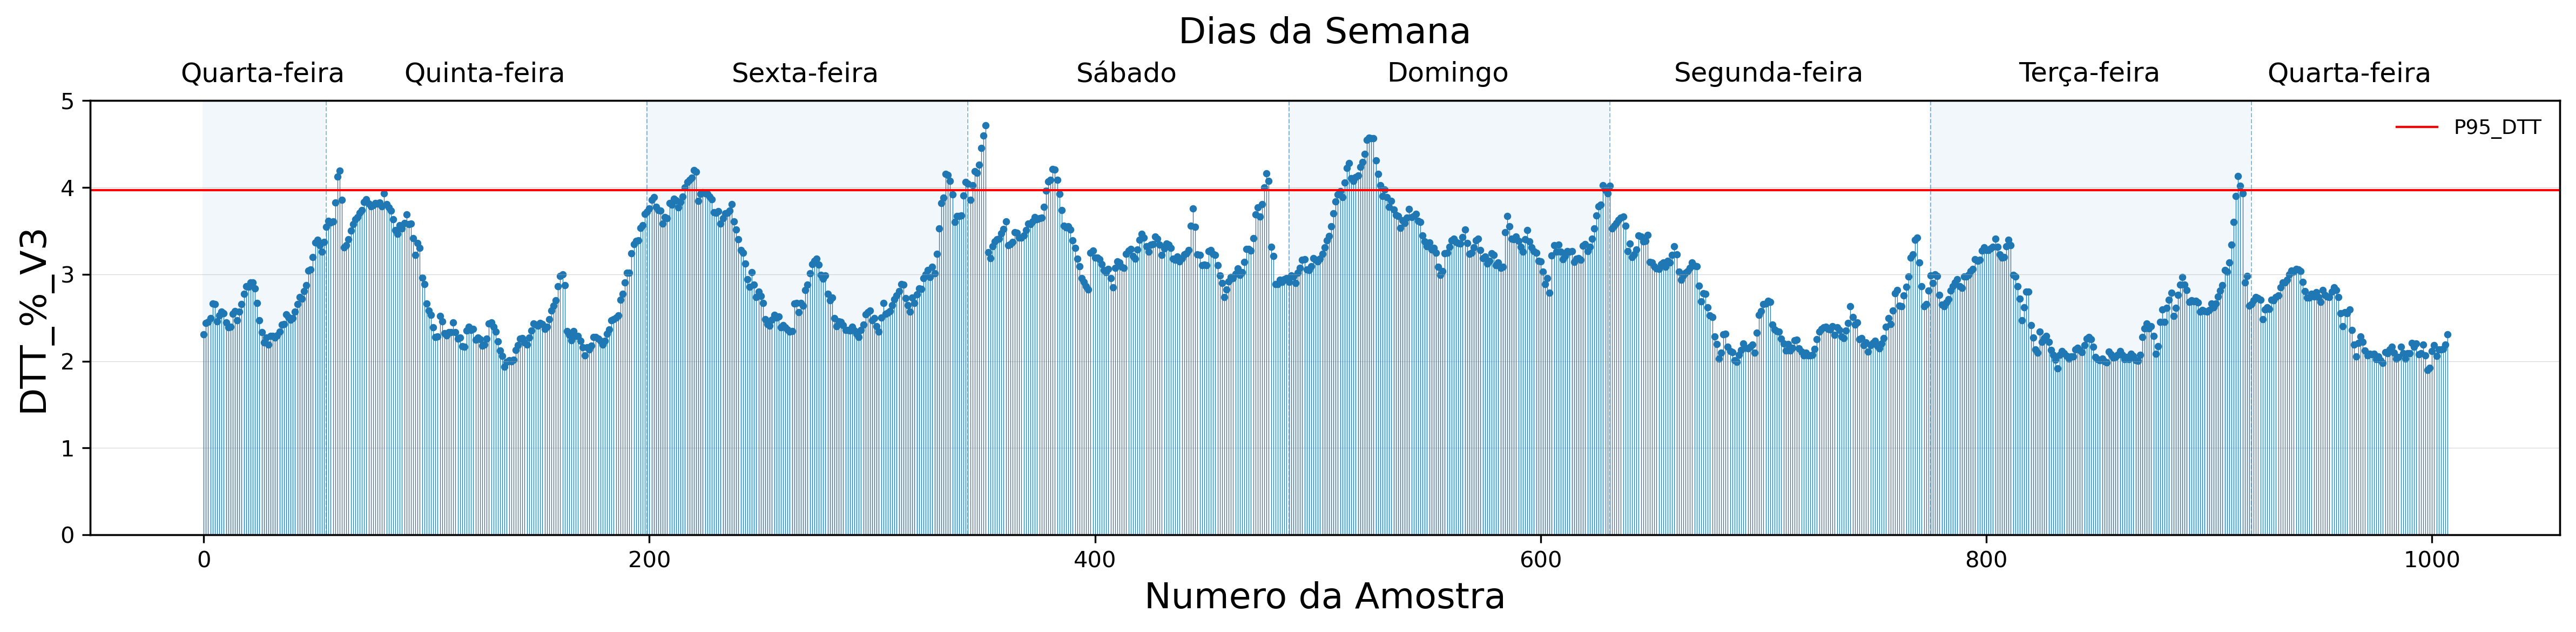

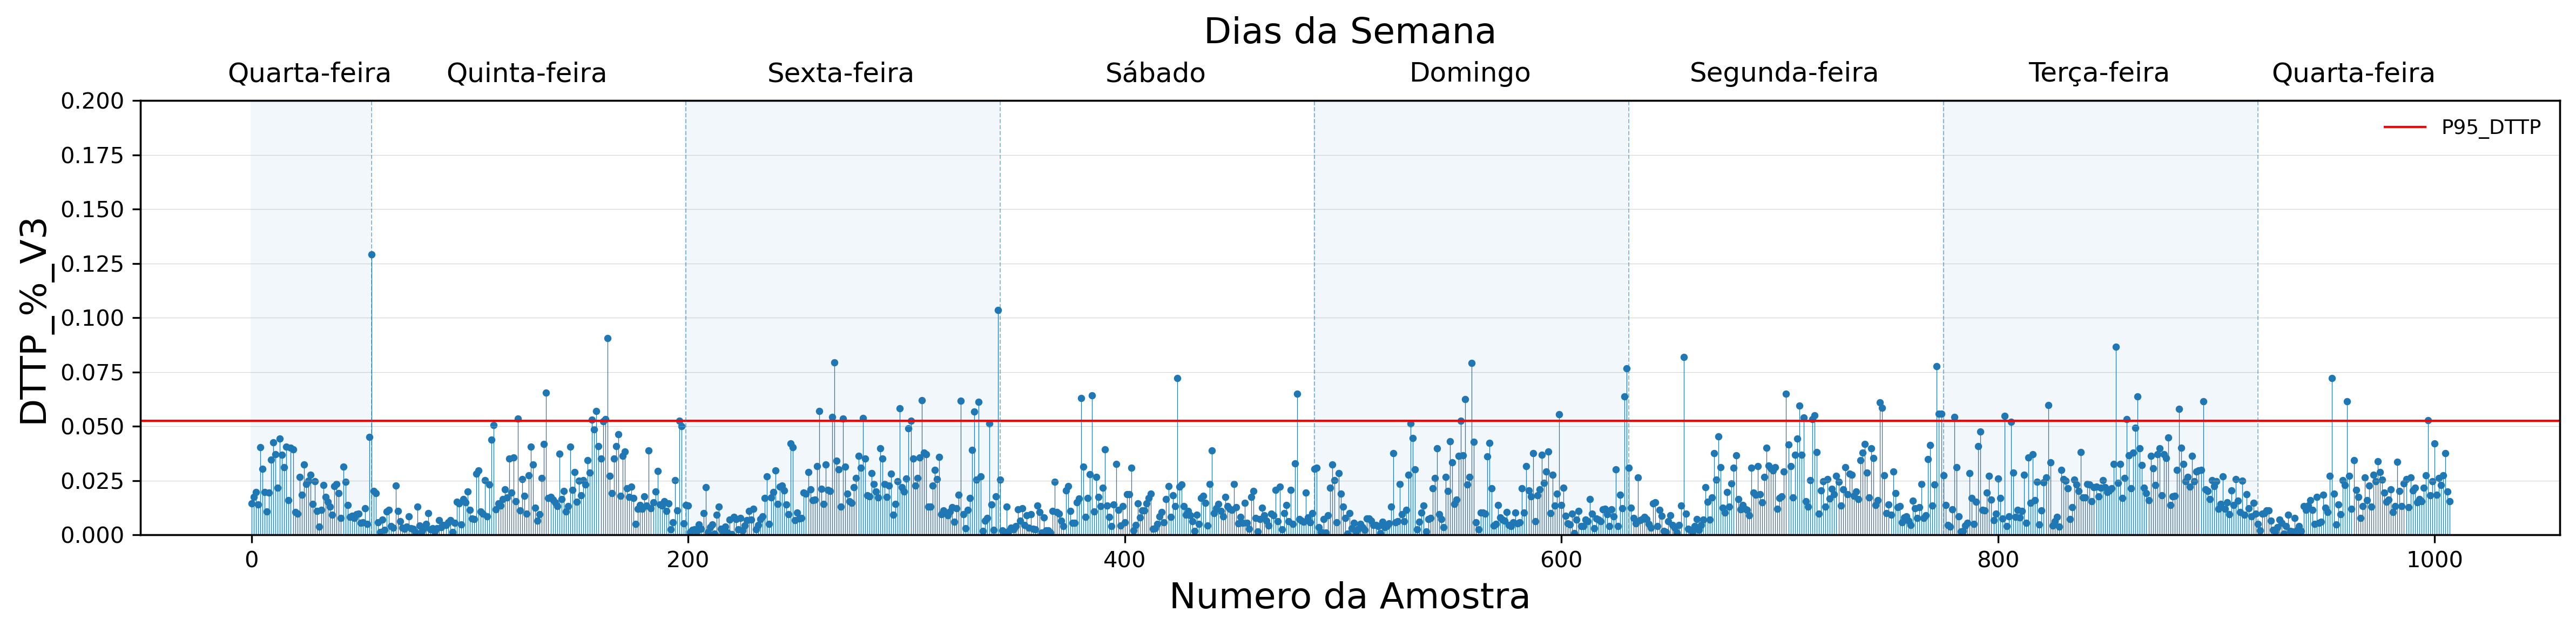

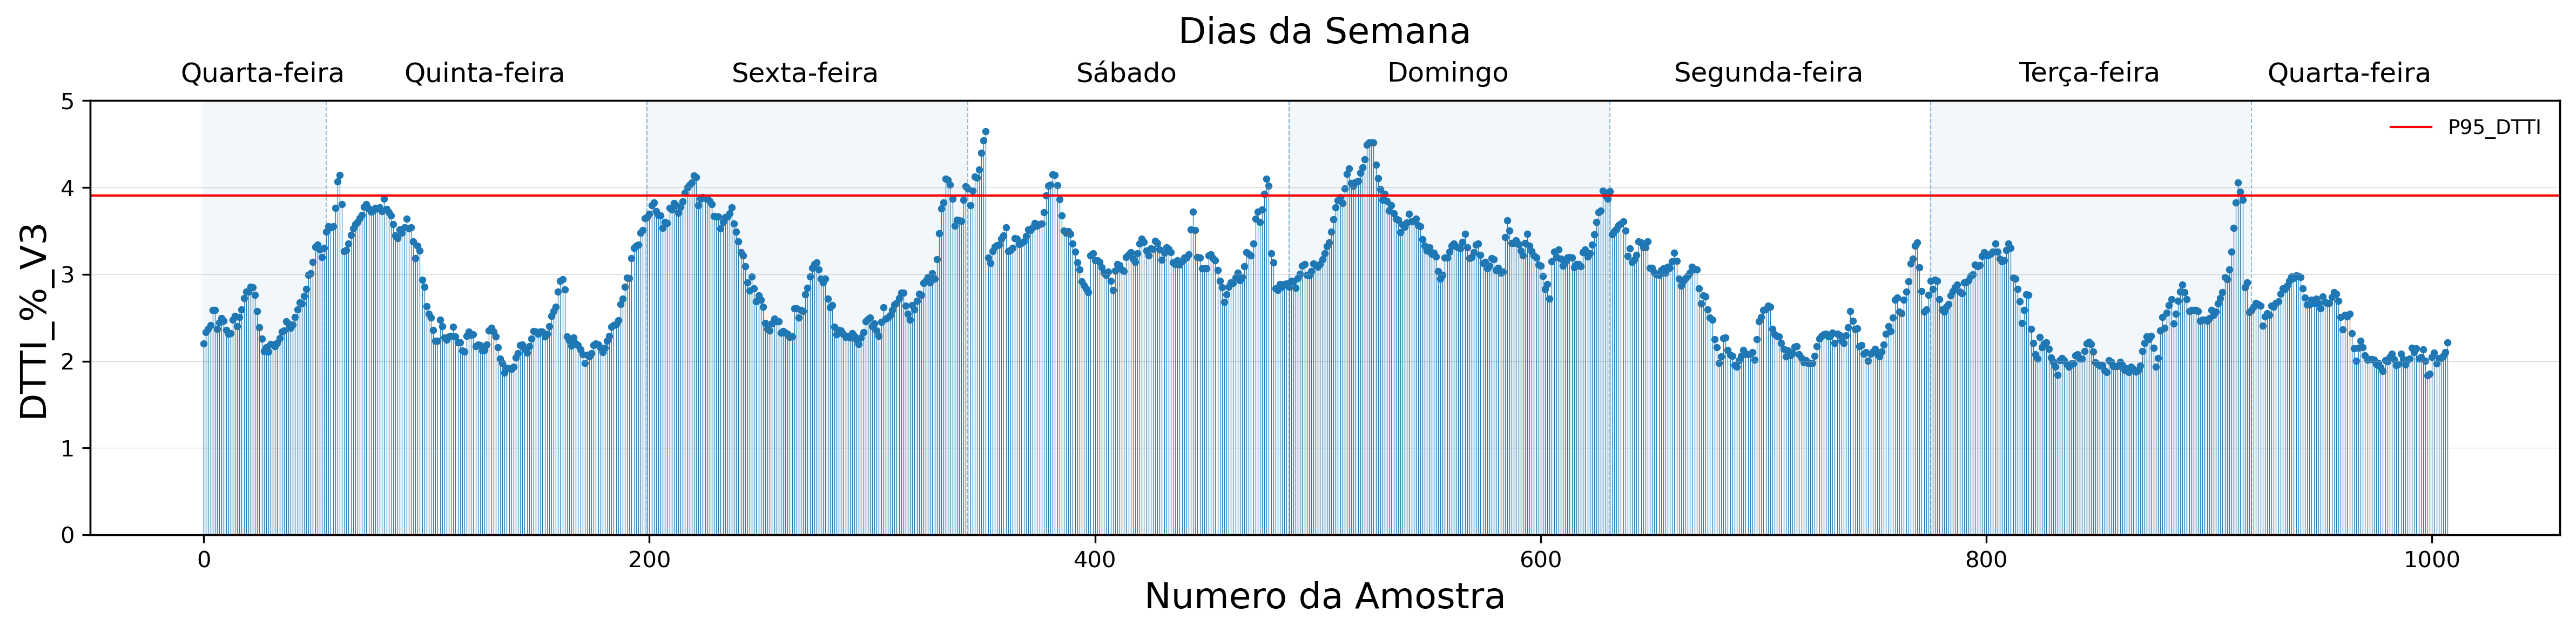

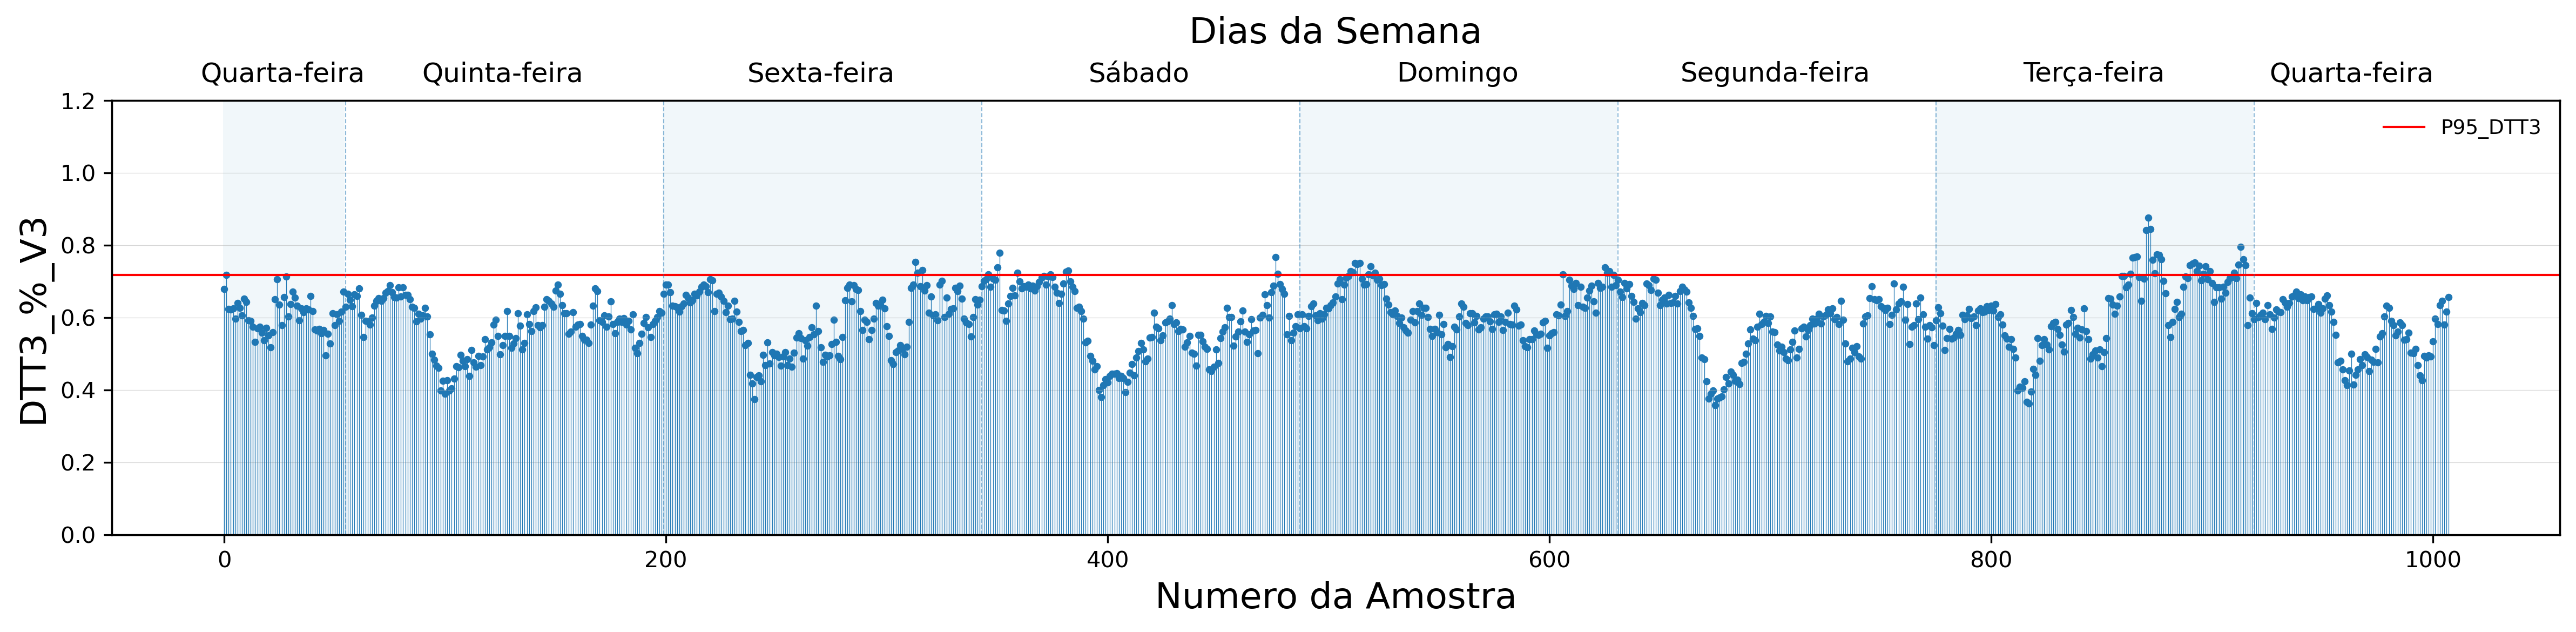

In [28]:
fig = plot_lollipop(df_dist, 'DTT_%', 'Dia_Semana_PT_BR', y_lim=(0, 5), linha_const_valor=p95_dtt, linha_const_nome="P95_DTT")
fig = plot_lollipop(df_dist, 'DTTP_%', 'Dia_Semana_PT_BR', y_lim=(0, 0.2), linha_const_valor=p95_dttp, linha_const_nome="P95_DTTP")
fig = plot_lollipop(df_dist, 'DTTI_%', 'Dia_Semana_PT_BR', y_lim=(0, 5), linha_const_valor=p95_dtti, linha_const_nome="P95_DTTI")
fig = plot_lollipop(df_dist, 'DTT3_%', 'Dia_Semana_PT_BR', y_lim=(0, 1.2), linha_const_valor=p95_dtt3, linha_const_nome="P95_DTT3")


# Gráfico Harmônicas

In [29]:
def grafico_lollipop_harmonicas(
    df: pd.DataFrame,
    fase: str,
    unidade: str = "[V]",           # "[A]" para corrente, "[V]" para tensão
    percentil: float = 0.95,
    excluir_fundamental: bool = True,
    figsize: tuple = (16, 5),
    dpi: int = 300,
    sombrear: bool = True,
    cor_linha: str = "C0",
    cor_ponto: str = "C3",
    linewidth: float = 0.7,
    tamanho_ponto: float = 30.0,
):
    """
    Plota um gráfico Lollipop (linha vertical + ponto) com o percentil das harmônicas.

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame com colunas de harmônicas contendo a unidade (ex.: "H3 [A]", "H5 [V]").
    fase : str
        Identificador da fase para o título (ex.: "A", "B", "C").
    unidade : str, opcional
        Unidade para filtrar as colunas. Use "[A]" (corrente) ou "[V]" (tensão).
    percentil : float, opcional
        Percentil a ser calculado (padrão 0.95).
    excluir_fundamental : bool, opcional
        Se True, ignora a primeira coluna do conjunto filtrado (assumida como fundamental).
    figsize : tuple, opcional
        Tamanho da figura.
    dpi : int, opcional
        DPI da figura.
    sombrear : bool, opcional
        Se True, aplica faixas alternadas de sombreamento para leitura.
    cor_linha : str, opcional
        Cor das linhas (vlines).
    cor_ponto : str, opcional
        Cor dos pontos (scatter).
    linewidth : float, opcional
        Espessura das linhas.
    tamanho_ponto : float, opcional
        Tamanho dos marcadores.

    Retorna
    -------
    (fig, ax) : tuple
        Figura e eixos do Matplotlib.
    """
    # --- Seleciona colunas pela unidade ---
    cols = [c for c in df.columns if unidade in c]
    if not cols:
        raise ValueError(f"Não encontrei colunas com {unidade} no DataFrame.")

    # --- Opcionalmente ignora a fundamental (assumida como 1ª coluna) ---
    cols_plot = cols[1:] if (excluir_fundamental and len(cols) > 1) else cols
    if not cols_plot:
        raise ValueError("Após remover a fundamental, não sobraram colunas para plotar.")

    # --- Calcula o percentil desejado e descarta NaNs ---
    valores = df[cols_plot].quantile(percentil).dropna()

    # --- Extrai os rótulos das harmônicas (número dentro do nome) ---
    def _extrair_harmonica(nome_col: str) -> str:
        m = re.search(r"(\d+)", nome_col)
        if m:
            return m.group(1)
        return nome_col.replace(unidade, "").strip()

    harmonicas = [_extrair_harmonica(c) for c in valores.index]

    # --- DataFrame auxiliar para plot ---
    df_percentis = pd.DataFrame({
        "Harmonica": harmonicas,
        "Valor": valores.values
    })
    df_percentis["Amostra"] = np.arange(len(df_percentis))

    # --- Rótulo do eixo Y conforme unidade ---
    if unidade == "[A]":
        ylabel = "Corrente [A]"
    elif unidade == "[V]":
        ylabel = "Tensão [V]"
    else:
        ylabel = f"Valor {unidade}"

    # --- Plot Lollipop ---
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.vlines(df_percentis["Amostra"], 0, df_percentis["Valor"], color=cor_linha, linewidth=linewidth)
    ax.scatter(df_percentis["Amostra"], df_percentis["Valor"], color=cor_ponto, s=tamanho_ponto, zorder=3)

    # --- Personalização ---
    ax.set_xticks(df_percentis["Amostra"])
    ax.set_xticklabels(df_percentis["Harmonica"], rotation=45, ha="right", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xlabel("Harmônica", fontsize=14)
    ax.set_title(f"Percentil {int(percentil*100)} das Harmônicas - Fase {fase}", fontsize=16)
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)

    # --- Sombreamento alternado ---
    if sombrear:
        for i in range(len(df_percentis)):
            if i % 2 == 0:
                ax.axvspan(i - 0.5, i + 0.5, alpha=0.05, color="gray")

    plt.tight_layout()
    return fig, ax

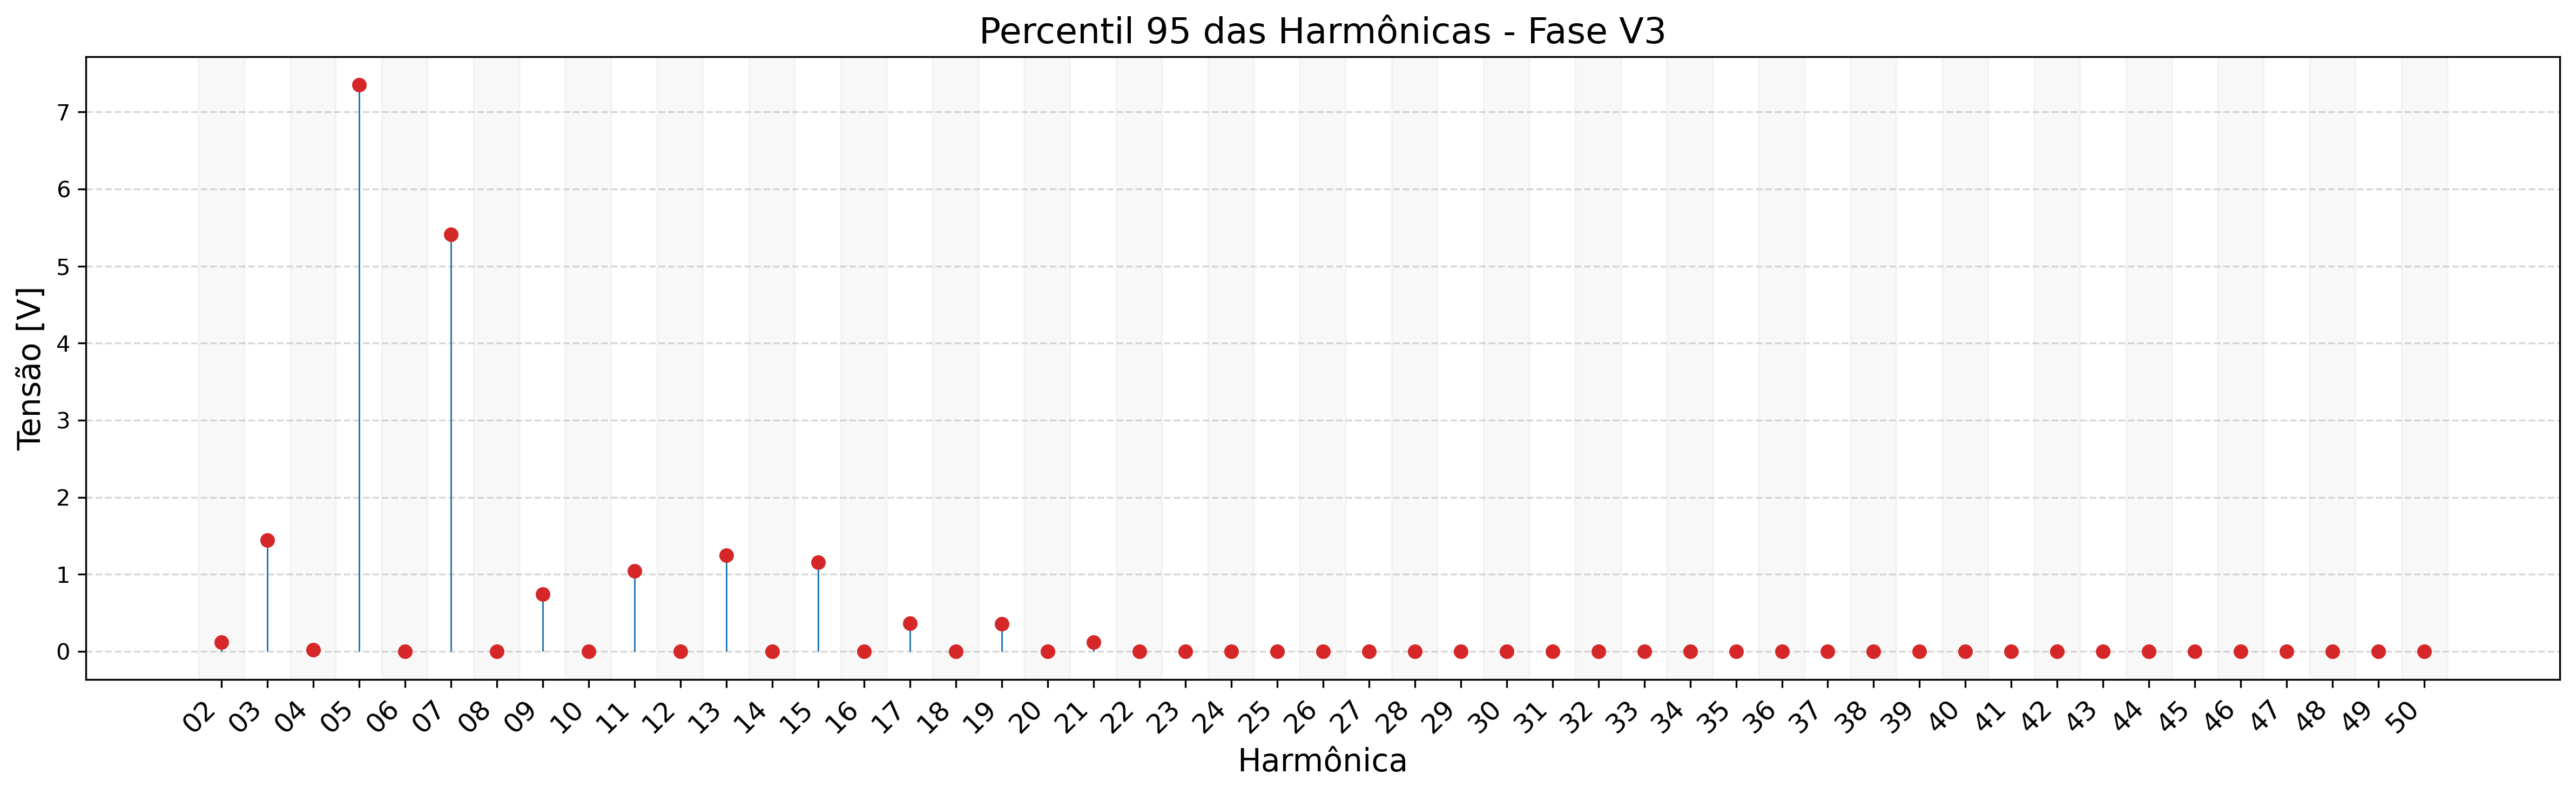

In [30]:
fig = grafico_lollipop_harmonicas(dados_H, fase, unidade='[V]')

# Gráfico Pizza Proporção Harmônicas

In [31]:
def grafico_pizza_harmonicas(
    df: pd.DataFrame,
    fase: str,
    unidade: str = "[A]",
    percentil: float = 0.95,
    excluir_fundamental: bool = True,
    min_percent: float = 0.02,
    ordenar_por: str = "valor",      # "valor" (desc) ou "harmonica" (asc)
    figsize: tuple = (4, 4),
    dpi: int = 150,
    mostrar_valor: bool = False,      # mostra valor absoluto além do %
    # --- novos controles de layout/rotulagem ---
    fontsize_pct: int = 11,          # tamanho da fonte dos percentuais (autopct)
    pct_r: float = 0.85,              # distância radial dos percentuais (0=centro, 1=borda)
    label_r: float = 1.15,           # raio dos rótulos das fatias (fora do círculo)
    fontsize_label: int = 10,        # tamanho da fonte dos rótulos Hn/Outras
):
    """
    Pizza da proporção entre harmônicas pelo percentil escolhido, com percentuais
    próximos da borda e rótulos das harmônicas fora, junto de cada fatia.
    """
    # --- Seleciona colunas pela unidade ---
    cols = [c for c in df.columns if unidade in c]
    if not cols:
        raise ValueError(f"Não encontrei colunas com {unidade} no DataFrame.")

    # --- Ignora a fundamental (assumida como 1ª coluna filtrada) ---
    cols_plot = cols[1:] if (excluir_fundamental and len(cols) > 1) else cols
    if not cols_plot:
        raise ValueError("Após remover a fundamental, não sobraram colunas para plotar.")

    # --- Calcula o percentil e remove NaNs ---
    valores = df[cols_plot].quantile(percentil).dropna()
    if valores.empty:
        raise ValueError("Sem valores válidos para o percentil calculado.")

    # --- Extrai número da harmônica ---
    def _extrair_harmonica(nome_col: str) -> int:
        m = re.search(r"(\d+)", nome_col)
        return int(m.group(1)) if m else 0

    harmonicas_num = [_extrair_harmonica(c) for c in valores.index]

    aux = pd.DataFrame({"HarmonicaNum": harmonicas_num, "Valor": valores.values})
    aux = aux[aux["Valor"] > 0]
    if aux.empty:
        raise ValueError("Todos os valores do percentil são zero; nada para plotar.")

    # --- Ordenação ---
    if ordenar_por == "harmonica":
        aux = aux.sort_values("HarmonicaNum", ascending=True)
    else:
        aux = aux.sort_values("Valor", ascending=False)

    # --- Proporções e agrupamento ---
    total = aux["Valor"].sum()
    aux["Proporcao"] = aux["Valor"] / total
    pequenas = aux["Proporcao"] < min_percent
    if pequenas.any():
        outras_val = aux.loc[pequenas, "Valor"].sum()
        outras_prop = outras_val / total
        aux = aux.loc[~pequenas].copy()
        aux = pd.concat([
            aux,
            pd.DataFrame({"HarmonicaNum": [-1], "Valor": [outras_val], "Proporcao": [outras_prop]})
        ], ignore_index=True)

    def _rotulo(hn: int) -> str:
        return "Outras" if hn == -1 else f"H{hn}"

    labels = [_rotulo(h) for h in aux["HarmonicaNum"]]
    proporcoes = aux["Proporcao"].values

    unidade_limpa = unidade.strip("[]")

    def _autopct_fmt(pct):
        if pct <= 0:
            return ""
        valor_abs = pct / 100.0 * total
        return f"{pct:.1f}%\n{valor_abs:.3g} {unidade_limpa}" if mostrar_valor else f"{pct:.1f}%"

    # --- Plot ---
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    wedges, _, autotexts = ax.pie(
        proporcoes,
        labels=None,               # rótulos fora serão anotados manualmente
        autopct=_autopct_fmt,
        startangle=120,
        counterclock=False,
        pctdistance=pct_r,         # percentuais mais perto da borda
    )
    ax.axis("equal")

    # Ajusta fonte dos percentuais
    for t in autotexts:
        t.set_fontsize(fontsize_pct)

    # Anota rótulos das fatias FORA do círculo, perto de cada wedge
    for w, lab in zip(wedges, labels):
        ang = (w.theta1 + w.theta2) / 2.0
        ang_rad = np.deg2rad(ang)
        x = label_r * np.cos(ang_rad)
        y = label_r * np.sin(ang_rad)
        ax.text(x, y, lab, ha="center", va="center", fontsize=fontsize_label)

    titulo_unidade = "Corrente [A]" if unidade == "[A]" else ("Tensão [V]" if unidade == "[V]" else f"Valor {unidade}")
    ax.set_title(
        f"Proporção das Harmônicas (P{int(percentil*100)}) - Fase {fase}\n{titulo_unidade}",
        fontsize=12
    )

    plt.tight_layout()
    return fig, ax


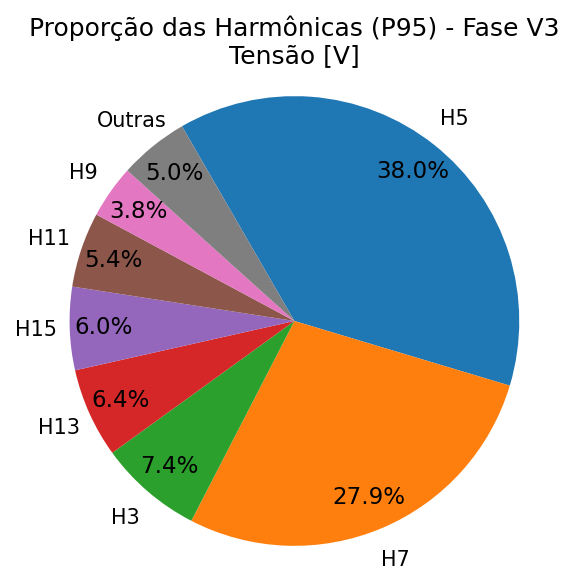

In [32]:
fig = grafico_pizza_harmonicas(dados_H, fase, unidade='[V]', ordenar_por='valor')

# Gráficos Pizza DTT

In [33]:
def criar_grafico_pizza_tipo_hora(df, coluna, coluna_flag, valor_limite, fase, quadro=''):
    # Cria/atualiza coluna Flag
    df[coluna_flag] = np.where(df[coluna] > valor_limite, 1, 0)

    mask = df[coluna_flag].eq(1)

    # Conta ocorrências por Tipo_Hora (mantendo NaN se houver)
    counts = df.loc[mask, "Tipo_Hora"].value_counts(dropna=False).sort_index()

    if counts.sum() == 0:
        print(f"Não há registros com {coluna} > {valor_limite} para plotar.")
        return

    valores = counts.values
    total = valores.sum()

    # Oculta rótulo quando valor é zero
    rotulos = [str(lbl) if v > 0 else '' for lbl, v in zip(counts.index.astype(str), valores)]

    # Oculta "0.0%" quando o valor absoluto é 0
    def _autopct(pct):
        absoluto = pct * total / 100.0
        return "" if absoluto <= 0 else f"{pct:.1f}%"

    fig, ax = plt.subplots()
    ax.pie(
        valores,
        labels=rotulos,
        autopct=_autopct,
        startangle=90
    )
    ax.set_title(f"{coluna} fase {fase} > {valor_limite} por horário do dia")
    ax.axis("equal")  # pizza circular

    # opcional: exibir na tela (pode comentar se não quiser exibir ao criar)
    # plt.show()

    if quadro:
        nome = f"{quadro}_{coluna}_limite{valor_limite}_grafico_pizza_tipo_hora.png"
        fig.savefig(nome, dpi=300, bbox_inches="tight")

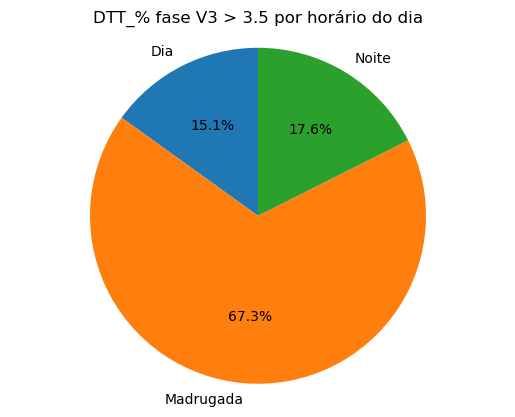

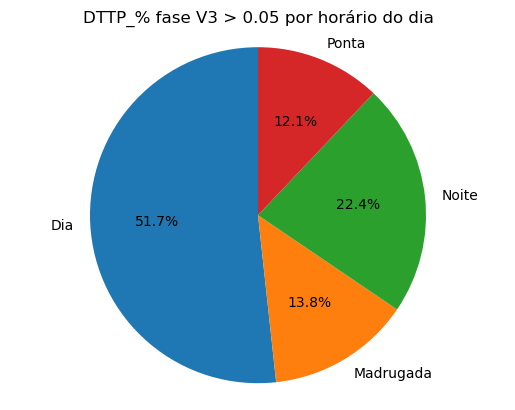

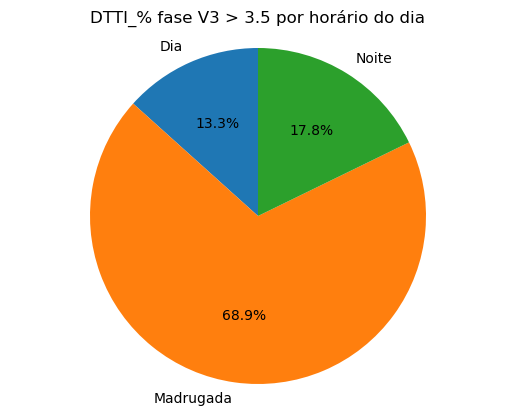

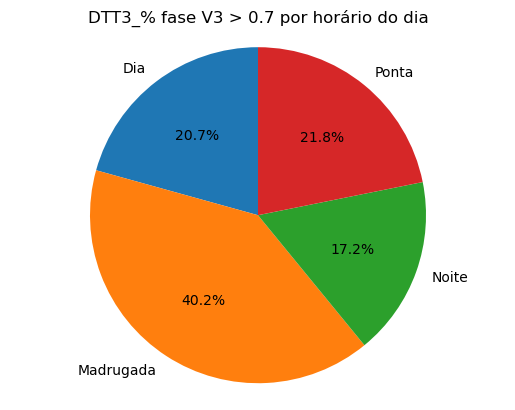

In [34]:
criar_grafico_pizza_tipo_hora(df_dist, 'DTT_%', 'flag_DTT_%', 3.5, fase, quadro)
criar_grafico_pizza_tipo_hora(df_dist, 'DTTP_%', 'flag_DTTP_%', 0.050, fase, quadro)
criar_grafico_pizza_tipo_hora(df_dist, 'DTTI_%', 'flag_DTTI_%', 3.5, fase, quadro)
criar_grafico_pizza_tipo_hora(df_dist, 'DTT3_%', 'flag_DTT3_%', 0.7, fase, quadro)

In [35]:
def criar_grafico_pizza_dia_semana(df, coluna, coluna_flag, valor_limite, fase, quadro=''):
    # ordem desejada (PT-BR)
    ordem = [
        "Segunda-feira", "Terça-feira", "Quarta-feira",
        "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"
    ]

    # Cria/atualiza coluna Flag
    df[coluna_flag] = np.where(df[coluna] > valor_limite, 1, 0)

    # Filtra os registros com flag == 1
    mask = df[coluna_flag].eq(1)

    # Converte para categórico ordenado e conta
    s = df.loc[mask, "Dia_Semana_PT_BR"].astype(
        pd.CategoricalDtype(categories=ordem, ordered=True)
    )
    counts = s.value_counts(dropna=False, sort=False)

    if counts.sum() == 0:
        print(f"Não há registros com {coluna} > {valor_limite} para plotar.")
        return

    # Valores e rótulos, ocultando o índice quando o valor é zero
    valores = counts.values
    rotulos = [str(lbl) if v > 0 else '' for lbl, v in zip(counts.index.astype(str), valores)]

    # Função autopct que oculta "0.0%" (quando valor absoluto é 0)
    total = valores.sum()
    def _autopct(pct):
        # calcula o valor absoluto correspondente a pct
        absoluto = pct * total / 100.0
        return "" if absoluto <= 0 else f"{pct:.1f}%"

    fig, ax = plt.subplots()
    ax.pie(
        valores,
        labels=rotulos,
        autopct=_autopct,
        startangle=90
    )
    ax.set_title(f"{coluna} fase {fase} > {valor_limite} por Dia da Semana")
    ax.axis("equal")  # pizza circular

    if quadro:
        nome = f"{quadro}_{coluna}_limite{valor_limite}_grafico_pizza_dia_semana.png"
        fig.savefig(nome, dpi=300, bbox_inches="tight")


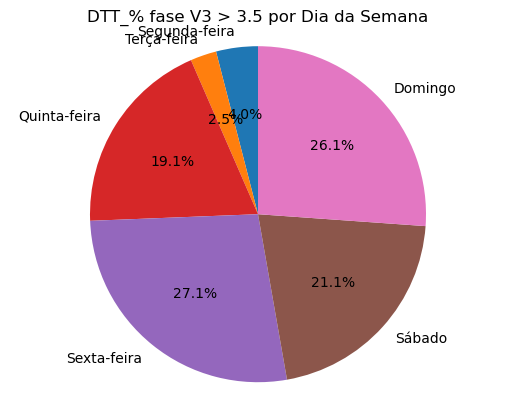

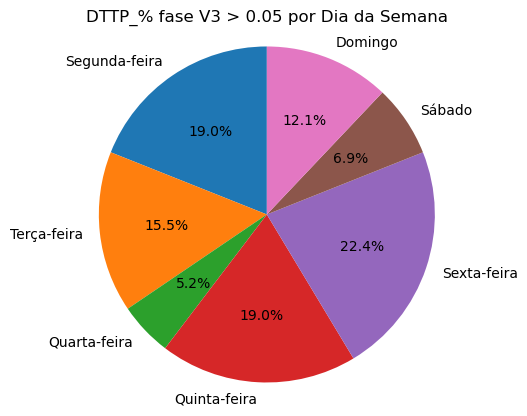

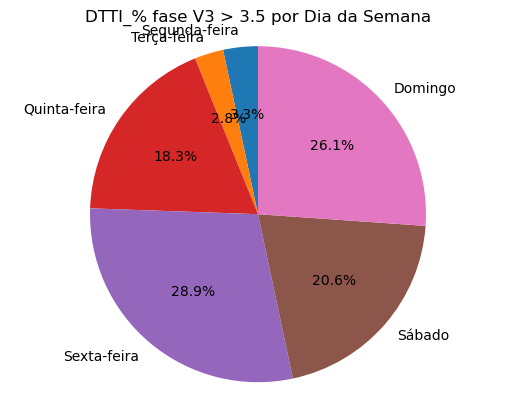

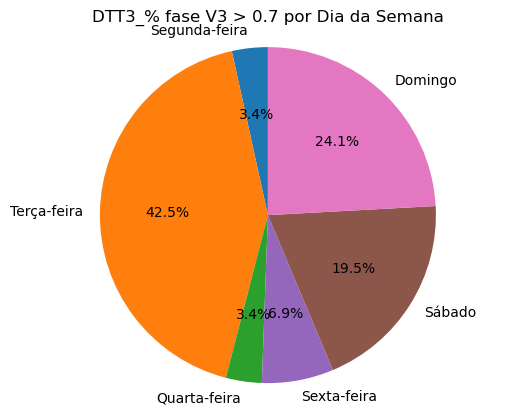

In [36]:
criar_grafico_pizza_dia_semana(df_dist, 'DTT_%', 'flag_DTT_%', 3.5, fase, quadro)
criar_grafico_pizza_dia_semana(df_dist, 'DTTP_%', 'flag_DTTP_%', 0.050, fase, quadro)
criar_grafico_pizza_dia_semana(df_dist, 'DTTI_%', 'flag_DTTI_%', 3.5, fase, quadro)
criar_grafico_pizza_dia_semana(df_dist, 'DTT3_%', 'flag_DTT3_%', 0.7, fase, quadro)